## Importing important libraries.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn')

In [4]:
data = pd.read_csv("Dataset/cardio_train.csv",sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
print(f'Dataset Shape: {data.shape}')

Dataset Shape: (70000, 13)


### Assumptions

Below are some of the key assumptions that we can make about the data and will look to validate them with the data in hand.

- With the increase in age chances of heart disease increases.
- Effect of height and weight. We assume that with more BMI chances of heart diesease is more.
- ap_hi > ap_lo. With the increaes of bp the chances of heart attack are more. Check if we have patients with low bp but still have the disease.
- With increase of cholesterol the chances of heart disease increases as per scientific tests.
- Increase in blood glucose levels could be a cause of increased heart risk.
- Check about how patient drinking and smoking habbits would increase the chances of heart risk. Are drinking men/women more prone to having a heart disease ?
- Physical Activity is assumed to help in lower cholesterol and thus lower chances of heart disease.

### Feature Engineering Steps

- Use height and weight to calculate BMI of a patient and see if it has some impact on the target variable.
- Combine smoking and alcohol as a single feature using feature interaction.
- We can think of creating a feature based on age and gender of a person to check if he/she is more likely to have diseased.

### Code

In [6]:
# Identifying missing values and duplicates first.

data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
duplicates = len(data) - len(data.drop(['id'],axis=1).drop_duplicates())
data.drop(['id'],axis=1,inplace=True)
data.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [8]:
data.shape

(69976, 12)

From the above we can see that we do not have any missing values into our dataset and also have removed 24 duplicate records.

### Descriptive stats about data

In [9]:
print(f'{data.dtypes.value_counts()}')

int64      11
float64     1
dtype: int64


In [10]:
print('Let us now get a quick summary of features available.')
data.describe().T.round(2)  # transposed

Let us now get a quick summary of features available.


,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.95,2467.37,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.35,0.48,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.21,14.40,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.82,154.04,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.64,188.50,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.37,0.68,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.23,0.57,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.09,0.28,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0


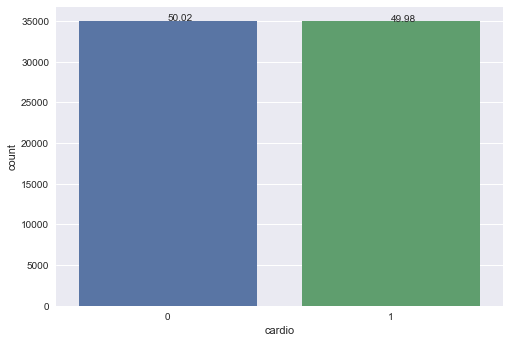

In [11]:
# Let us first have a look at our target variable and see if it is balanced or not 

fig, ax = plt.subplots(1,1)
sns.countplot(data['cardio'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}'.format((i.get_height()/len(data['cardio']))*100,'%'))
plt.show()

as we can see that the target variable is balanced